In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
for row in session.query(Measurement.date, Measurement.station).limit(5).all():
        print(row)

('2010-01-01', 'USC00519397')
('2010-01-02', 'USC00519397')
('2010-01-03', 'USC00519397')
('2010-01-04', 'USC00519397')
('2010-01-06', 'USC00519397')


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
measurement_df = pd.read_sql_query("SELECT date FROM measurement ORDER BY date DESC LIMIT 1", engine)
recent_date = measurement_df["date"].iloc[0]
recent_date

'2017-08-23'

In [12]:
# Calculate the date one year from the last date in data set.
prev_year = dt.datetime.strptime(recent_date, "%Y-%m-%d").date() - dt.timedelta(365)
prev_year

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
results_df = pd.DataFrame(results, columns=["Date", "Precipitation"]).dropna().set_index("Date").sort_index()
results_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


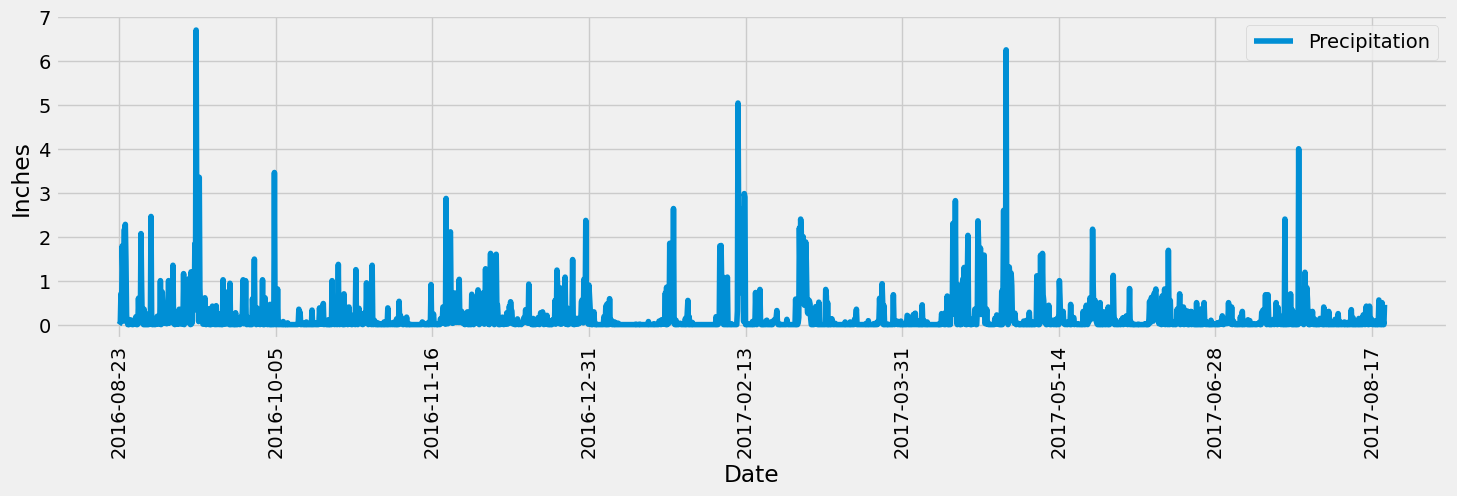

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(rot=90, figsize=[16,4], ylabel = "Inches");

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [17]:
stations = session.query(Station.station).all()
stations

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [18]:
stations = pd.read_sql_query("SELECT station FROM station", engine)
stations

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [42]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count()

9

In [49]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count()).group_by(Measurement.station).\
    order_by(func.count().desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
pd.DataFrame().hist

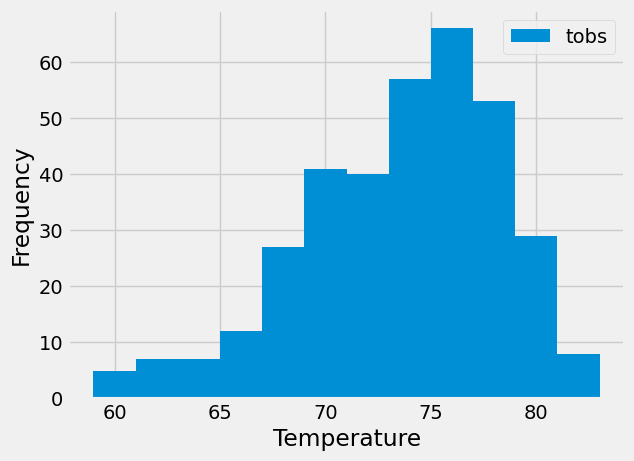

In [66]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_results = session.query(Measurement.tobs).filter((Measurement.date >= prev_year)&
                                       (Measurement.station == "USC00519281")).all()
pd.DataFrame(station_results).hist(bins=12, legend=True)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()